<h1 style="font-family:Arial; color:black; font-size:24px;">Émissions de GES et distance moyenne des trajets domicile-travail selon le département de résidence en 2019</h1>

<p style="font-family:Verdana; font-size:14px;">Ce dataset contient des informations sur les émissions de GES (Gaz à Effet de Serre) et la distance moyenne des trajets domicile-travail pour 96 départements français. L'objectif est de vérifier la relation entre les émissions de GES et la distance parcourue, tout en identifiant les départements qui émettent le plus de GES. Une analyse par région géographique permettra de comparer et de classer les départements en fonction de leurs émissions de GES.</p>



<h1 style="font-family:Arial; color:black; font-size:15px;">1 - Importation de mes librairies et importation de mon dataset.J'identifie le type du DataFrame, remplace les virgules par des points dans les colonnes numériques, convertit les colonnes de GES et Distance en float pour les rendre manipulables.</h1> 

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import geopandas as gpd
import plotly.express as px 

#Lire mon dataset  
ds = pd.read_csv('Figure1.csv' , sep = ';', encoding='ISO-8859-1') 
ds.head(97)       

#Type de mes données 
type(ds) 
print(type(ds))    
 
#Transformer mes virgules en points 
colonnes_a_modifier = ['Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)', 'Distance domicile-travail moyenne\n(en km)']
for col in colonnes_a_modifier:
    ds[col] = ds[col].str.replace(",", ".", regex=False)
ds.head(97)

#Passer les valeurs numeriques en type float pour pouvoir les manipuler 
ds['Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)'] = ds['Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)'].astype(float)
ds['Distance domicile-travail moyenne\n(en km)'] = ds['Distance domicile-travail moyenne\n(en km)'].astype(float)

ds.head(97)
   

<class 'pandas.core.frame.DataFrame'>


,Numéro de département,Nom de département,Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an),Distance domicile-travail moyenne\n(en km)
0,01,Ain,0.930,17.5
1,02,Aisne,0.957,17.7
2,03,Allier,0.748,12.9
3,04,Alpes-de-Haute-Provence,0.810,13.9
4,05,Hautes-Alpes,0.597,9.8
...,...,...,...,...
91,91,Essonne,0.625,17.9
92,92,Hauts-de-Seine,0.240,8.9
93,93,Seine-Saint-Denis,0.297,11.5
94,94,Val-de-Marne,0.308,11.6


<h1 style="font-family:Arial; color:black; font-size:15px;"> 2 - Générer des statistiques descriptives (Moy, Ecart type, min, max, les quartiles)  sur chaque colonne numérique.</h1>

In [34]:

#Générer mes statistiques descriptives
stat = ds.drop(columns=['Nom de département']).describe()
print(stat)          
  

       Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)  \
count                                          96.000000                                            
mean                                            0.770021                                            
std                                             0.156850                                            
min                                             0.098000                                            
25%                                             0.727000                                            
50%                                             0.793000                                            
75%                                             0.837500                                            
max                                             1.102000                                            

       Distance domicile-travail moyenne\n(en km)  
count                                 

<h1 style="font-family:Arial; color:black; font-size:15px;">3 - Ce code calcule les valeurs maximales, minimales et moyennes des colonnes GES et Distance, affiche les résultats, puis génère une matrice de corrélation entre ces deux colonnes. Les noms des lignes et colonnes de la matrice sont renommés pour un affichage clair, lisible et limité à 3 décimales. </h1>


In [35]:

#Renommer 
# Définir les noms exacts des colonnes
col_ges = 'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)'
col_km = 'Distance domicile-travail moyenne\n(en km)'

#MAX MIN MOYENNE GES et KM  
max_ges = ds[col_ges].max()
min_ges = ds[col_ges].min()
mean_ges = ds[col_ges].mean()

max_km = ds[col_km].max() 
min_km = ds[col_km].min()
mean_km = ds[col_km].mean()
 
# Affichage des résultats
print("GES : Max =", max_ges, ", Min =", min_ges, ", Moyenne =", mean_ges)
print("KM : Max =", max_km, ", Min =", min_km, ", Moyenne =", mean_km)

#Matrice de correlation 
correlation_matrix = ds[[col_km, col_ges]].corr()
# Renommer les colonnes pour un affichage propre 
correlation_matrix.index = ["Distance Moyenne (KM)", "GES (tCO2e)"]
correlation_matrix.columns = ["Distance Moyenne (KM)", "GES (tCO2e)"]
    
# Afficher avec un meilleur format  
print("Matrice de corrélation :\n")  
print(correlation_matrix.round(3))  # Limiter à 3 décimales pour plus de lisibilité

       

GES : Max = 1.102 , Min = 0.098 , Moyenne = 0.7700208333333333
KM : Max = 24.3 , Min = 6.9 , Moyenne = 14.227083333333333
Matrice de corrélation :

                       Distance Moyenne (KM)  GES (tCO2e)
Distance Moyenne (KM)                  1.000        0.716
GES (tCO2e)                            0.716        1.000


<h1 style="font-family:Arial; color:black; font-size:15px;">Matrice de correlation : </h1>
Il existe une corrélation positive forte (0.716) entre la distance domicile-travail et les émissions de GES. Cela signifie que lorsque la distance moyenne augmente, les émissions de GES augmentent également de manière significative.

<h1 style="font-family:Arial; color:black; font-size:15px;">4 - Ce code crée un graphique de régression linéaire montrant la relation entre la distance moyenne domicile-travail (km) et les émissions de GES (tCO2e). Il affiche un nuage de points (points bleus) et une droite de régression (ligne rouge) avec les annotations des valeurs minimales, maximales et moyennes de GES et de distance, ainsi que les intersections entre nos valeurs min, max et moy entre les deux colonnes.</h1>

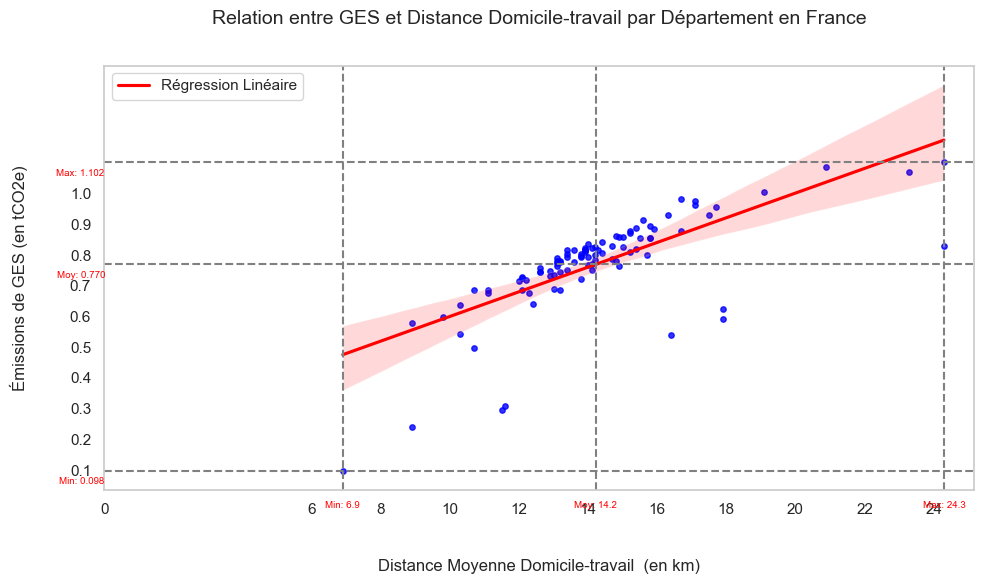

Les départements en dessous de la régression linéaire sont :
['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint-Denis', 'Val-de-Marne', 'Val-dOise']


In [45]:
# Création du graphique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Nuage de points et droite de régression
sns.regplot(
    data=ds, 
    x=col_km, 
    y=col_ges,
    line_kws={"color": "red", "label": "Régression Linéaire"},  # Style de la ligne
    scatter_kws={"s": 15, "color": "blue"}  # Style des points
)

# Affichage des valeurs sur l'axe Y
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xticks([0, 6, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0])

# Annotation des valeurs (Min, Max, Moy de KM) avec décalage vers la gauche, en rouge et en gras
plt.text(min_km, -0.03, f'Min: {min_km:.1f}', ha='center', va='bottom', color='red', fontsize=7)
plt.text(mean_km, -0.03, f'Moy: {mean_km:.1f}', ha='center', va='bottom', color='red', fontsize=7)
plt.text(max_km, -0.03, f'Max: {max_km:.1f}', ha='center', va='bottom', color='red', fontsize=7)

# Annotation des valeurs (Min, Max, Moy de GES) pour les GES sur l'axe Y
plt.text(min_ges - 0.1, min_ges - 0.05, f'Min: {min_ges:.3f}', ha='right', va='bottom', color='red', fontsize=7)
plt.text(mean_ges - 0.75, mean_ges - 0.05, f'Moy: {mean_ges:.3f}', ha='right', va='bottom', color='red', fontsize=7)
plt.text(max_ges - 1.1, max_ges - 0.05, f'Max: {max_ges:.3f}', ha='right', va='bottom', color='red', fontsize=7)

# Traits rouges pour relier les valeurs
for (x, y) in [(min_km, min_ges), (mean_km, mean_ges), (max_km, max_ges)]:
    plt.axvline(x, color='grey', linestyle='--')
    plt.axhline(y, color='grey', linestyle='--')


#Les points qui s'écartent de ma régression 

# Personnalisation du graphique
plt.title('Relation entre GES et Distance Domicile-travail par Département en France', fontsize=14, pad=30)
plt.xlabel('Distance Moyenne Domicile-travail  (en km)', fontsize=12, labelpad=30)
plt.ylabel('Émissions de GES (en tCO2e)', fontsize=12, labelpad=30)

# Ajouter une légende pour la droite de régression
plt.legend()
plt.grid(False)  
plt.tight_layout()   
  
# Afficher le graphique
plt.show()    


#Départements en dessous de la régression 
print("Les départements en dessous de la régression linéaire sont :")
print(['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint-Denis', 'Val-de-Marne', 'Val-dOise'])
 


  

<h1 style="font-family:Arial; color:black; font-size:15px;">Points bleus (nuage de points) : </h1>Chaque point bleu représente un département, chaque département est représenté par son abcisse x (KM) et son ordonnée y (GES)
<h1 style="font-family:Arial; color:black; font-size:15px;">Droite de régression (ligne rouge) : </h1>La droite de régression illustre la relation linéaire entre la distance et les émissions de GES. Elle montre que plus la distance domicile-travail augmente, plus les émissions de GES augmentent également.  GES = a×KM + b

<h1 style="font-family:Arial; color:black; font-size:15px;">Intervalle de confiance (Zone en Rouge pale) : </h1>
Plus l'intervalle est étroit, plus la droite de régression est précise pour modéliser la relation entre les deux variables (GES et distance).
Si l'intervalle est large, cela signifie qu'il existe plus de variabilité dans les données, donc la relation est moins fiable.
Si l'intervalle est étroit, cela indique que la relation est plus robuste et prévisible, dans notre cas pour des distances entre (10-18 km) et s'élargit légèrement pour les distances très courtes ou très longues, indiquant plus d'incertitude à ces extrémités.


<h1 style="font-family:Arial; color:black; font-size:15px;"> Conclusion :  </h1>
La concentration des points au centre indique que la majorité des départements ont des distances moyennes domicile-travail comprises entre 10 et 18 km et des émissions de GES entre 0.5 et 0.8 tCO2e. Quelques points s'écartent de la tendance, indiquant des variations spécifiques à certains départements.
Ce graphique montre donc qu'il existe une  RELATION DIRECT POSITIVE ENTRE LES DEUX VARIABLES (Car elles progréssent dans la meme direction) donc il existe une correlation


<h1 style="font-family:Arial; color:black; font-size:15px;">5 - Ce code trace une carte de la France segmentée par départements en affichant les émissions de GES (tCO2e/an) avec un dégradé de couleurs et les numéros des départements au centre de chaque polygone.</h1>

Nom de la colonne GES trouvé : GES (tCO2e / an)


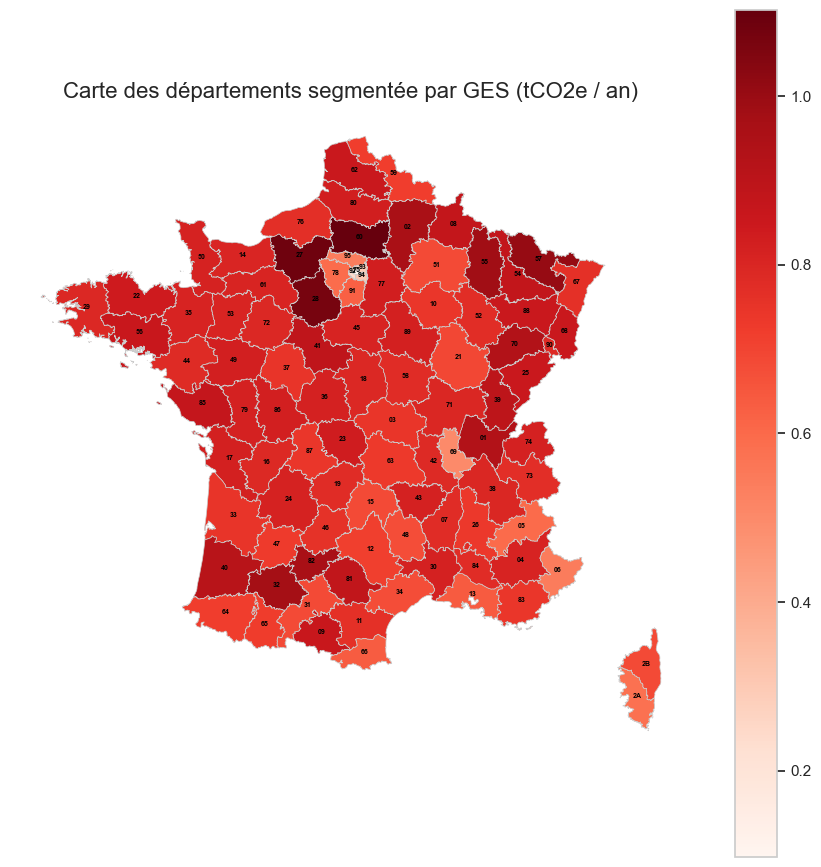

In [18]:
#### #Charger les fichiers CSV et GeoJSON
geojson_path = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
departements_gdf = gpd.read_file(geojson_path)

#Afficher les colonnes du fichier CSV
#print("Colonnes du CSV :", ds.columns)

#Renommer les colonnes pour simplifier l'accès
ds.rename(columns={
    'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)': 'GES (tCO2e / an)'
}, inplace=True)

#Vérifiez les colonnes après renommage
#print("Colonnes après renommage :", ds.columns)

#Colonnes fusionnées 
departements_gdf['code'] = departements_gdf['code'].astype(str)
ds['Numéro de département'] = ds['Numéro de département'].astype(str)

#Fusionner les données GeoJSON et ma Figure1
merged = departements_gdf.merge(ds, left_on='code', right_on='Numéro de département', how='left')

# Afficher les colonnes du GeoDataFrame fusionné
#print("Colonnes du GeoDataFrame fusionné :", merged.columns)

#Supprimer les géométries nulles
merged = merged[~merged['geometry'].isnull()]
   
#Supprimer les espaces invisibles des noms de colonnes
merged.columns = merged.columns.str.strip()

#Vérifier les colonnes après suppression des espaces
#print("Colonnes après suppression des espaces :", merged.columns)

# Vérifier si la colonne "GES" existe dans merged
for col in merged.columns:
    if 'GES' in col:
        print(f"Nom de la colonne GES trouvé : {col}")

#Tracer la carte
fig, ax = plt.subplots(1, 1, figsize=(11, 11))

#Tracer la carte avec un dégradé de couleurs
column_to_display = 'GES (tCO2e / an)' 
if column_to_display in merged.columns:
    merged.plot(
        column=column_to_display,
        cmap='Reds',
        linewidth=0.5,
        ax=ax,
        edgecolor='0.8',
        legend=True
    )
else:
    print(f"Erreur : La colonne '{column_to_display}' n'existe pas dans merged")

#Ajouter les numéros de départements sur la carte
for idx, row in merged.iterrows():
    centroid = row['geometry'].centroid  # Calculer le centroïde du polygone
    plt.text( 
        centroid.x, centroid.y, 
        row['code'], 
        fontsize=5, 
        ha='center', 
        color='black', 
        weight='bold'
    )
#Ajouter le titre et masquer les axes 
ax.set_title(f'Carte des départements segmentée par {column_to_display}', fontsize=16)
ax.set_axis_off()
plt.show()      

6 - Ce code reprend le dataset Figure1, le tri et le nettoie. Ajoute une colonne de région associée à chaque département, calcule l'empreinte de GES par région en France à l'aide de la fonction sum (Qui somme l'empreinte GES de tous les départements de cette région). Enfin, il trace un diagramme en barres affichant l'empreinte GES par région, avec les valeurs de GES annotées au-dessus de chaque barre. 

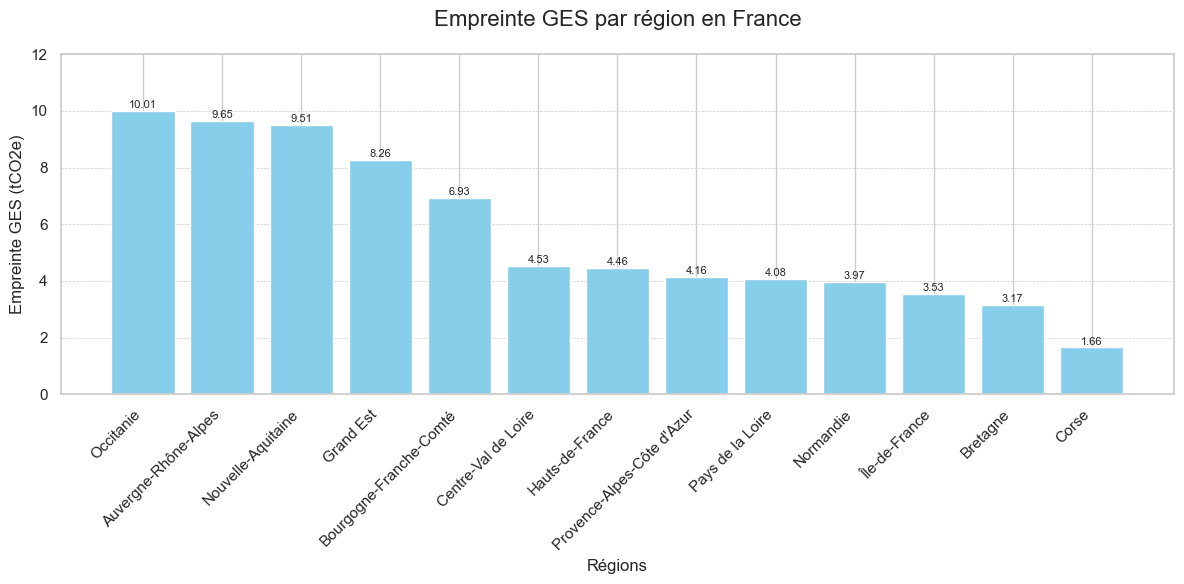

In [21]:
#Charger le CSV
geojson_path = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'

#Lire mon dataset  ds 
ds = pd.read_csv('Figure1.csv', sep = ';', encoding='ISO-8859-1') 
ds.head(97)  


#Supp la colonne km de ds 
ds = ds.drop(columns=["Distance domicile-travail moyenne\n(en km)"])
ds.head()

#Renommer 'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)' en  'GES'
ds.rename(columns={
    'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)': 'GES'
}, inplace=True)

#Transformer mes virgules en points de ds 
colonnes_a_modifier = ['GES']
for col in colonnes_a_modifier:
    ds[col] = ds[col].str.replace(",", ".", regex=False)
ds.head(97)

#Passer les valeurs numeriques en type float pour pouvoir les manipuler de ds 
ds['GES'] = ds['GES'].astype(float)

  
# Ajouter une correspondance complète des départements à leurs régions
ds['Region'] = departements_gdf['nom'].map({
    # Auvergne-Rhône-Alpes
    'Ain': 'Auvergne-Rhône-Alpes', 'Allier': 'Auvergne-Rhône-Alpes',
    'Ardèche': 'Auvergne-Rhône-Alpes', 'Cantal': 'Auvergne-Rhône-Alpes',
    'Drôme': 'Auvergne-Rhône-Alpes', 'Isère': 'Auvergne-Rhône-Alpes',
    'Loire': 'Auvergne-Rhône-Alpes', 'Haute-Loire': 'Auvergne-Rhône-Alpes',
    'Puy-de-Dôme': 'Auvergne-Rhône-Alpes', 'Rhône': 'Auvergne-Rhône-Alpes',
    'Savoie': 'Auvergne-Rhône-Alpes', 'Haute-Savoie': 'Auvergne-Rhône-Alpes',

    # Bourgogne-Franche-Comté
    'Côte-d\'Or': 'Bourgogne-Franche-Comté', 'Doubs': 'Bourgogne-Franche-Comté',
    'Jura': 'Bourgogne-Franche-Comté', 'Nièvre': 'Bourgogne-Franche-Comté',
    'Haute-Saône': 'Bourgogne-Franche-Comté', 'Saône-et-Loire': 'Bourgogne-Franche-Comté',
    'Yonne': 'Bourgogne-Franche-Comté', 'Territoire de Belfort': 'Bourgogne-Franche-Comté',

    # Bretagne
    'Côtes-d\'Armor': 'Bretagne', 'Finistère': 'Bretagne',
    'Ille-et-Vilaine': 'Bretagne', 'Morbihan': 'Bretagne',

    # Centre-Val de Loire
    'Cher': 'Centre-Val de Loire', 'Eure-et-Loir': 'Centre-Val de Loire',
    'Indre': 'Centre-Val de Loire', 'Indre-et-Loire': 'Centre-Val de Loire',
    'Loir-et-Cher': 'Centre-Val de Loire', 'Loiret': 'Centre-Val de Loire',

    # Corse
    'Corse-du-Sud': 'Corse', 'Haute-Corse': 'Corse',

    # Grand Est
    'Ardennes': 'Grand Est', 'Aube': 'Grand Est', 'Marne': 'Grand Est',
    'Haute-Marne': 'Grand Est', 'Meurthe-et-Moselle': 'Grand Est',
    'Meuse': 'Grand Est', 'Moselle': 'Grand Est', 'Bas-Rhin': 'Grand Est',
    'Haut-Rhin': 'Grand Est', 'Vosges': 'Grand Est',

    # Hauts-de-France
    'Aisne': 'Hauts-de-France', 'Nord': 'Hauts-de-France',
    'Oise': 'Hauts-de-France', 'Pas-de-Calais': 'Hauts-de-France',
    'Somme': 'Hauts-de-France',

    # Île-de-France
    'Paris': 'Île-de-France', 'Seine-et-Marne': 'Île-de-France',
    'Yvelines': 'Île-de-France', 'Essonne': 'Île-de-France',
    'Hauts-de-Seine': 'Île-de-France', 'Seine-Saint-Denis': 'Île-de-France',
    'Val-de-Marne': 'Île-de-France', 'Val-d\'Oise': 'Île-de-France',

    # Normandie
    'Calvados': 'Normandie', 'Eure': 'Normandie', 
    'Manche': 'Normandie', 'Orne': 'Normandie',
    'Seine-Maritime': 'Normandie',

    # Nouvelle-Aquitaine
    'Charente': 'Nouvelle-Aquitaine', 'Charente-Maritime': 'Nouvelle-Aquitaine',
    'Corrèze': 'Nouvelle-Aquitaine', 'Creuse': 'Nouvelle-Aquitaine',
    'Dordogne': 'Nouvelle-Aquitaine', 'Gironde': 'Nouvelle-Aquitaine',
    'Landes': 'Nouvelle-Aquitaine', 'Lot-et-Garonne': 'Nouvelle-Aquitaine',
    'Pyrénées-Atlantiques': 'Nouvelle-Aquitaine', 'Deux-Sèvres': 'Nouvelle-Aquitaine',
    'Vienne': 'Nouvelle-Aquitaine', 'Haute-Vienne': 'Nouvelle-Aquitaine',

    # Occitanie  
    'Ariège': 'Occitanie', 'Aude': 'Occitanie',
    'Aveyron': 'Occitanie', 'Gard': 'Occitanie',
    'Haute-Garonne': 'Occitanie', 'Gers': 'Occitanie',
    'Hérault': 'Occitanie', 'Lot': 'Occitanie',
    'Lozère': 'Occitanie', 'Hautes-Pyrénées': 'Occitanie',
    'Pyrénées-Orientales': 'Occitanie', 'Tarn': 'Occitanie',
    'Tarn-et-Garonne': 'Occitanie',

    # Pays de la Loire
    'Loire-Atlantique': 'Pays de la Loire', 'Maine-et-Loire': 'Pays de la Loire',
    'Mayenne': 'Pays de la Loire', 'Sarthe': 'Pays de la Loire',
    'Vendée': 'Pays de la Loire',

    # Provence-Alpes-Côte d'Azur
    'Alpes-de-Haute-Provence': 'Provence-Alpes-Côte d\'Azur',
    'Hautes-Alpes': 'Provence-Alpes-Côte d\'Azur',
    'Alpes-Maritimes': 'Provence-Alpes-Côte d\'Azur',
    'Bouches-du-Rhône': 'Provence-Alpes-Côte d\'Azur',
    'Var': 'Provence-Alpes-Côte d\'Azur',
    'Vaucluse': 'Provence-Alpes-Côte d\'Azur',
})
ds.head()

# Calculer la somme des GES par région  
ges_par_region = ds.groupby('Region')['GES'].sum().reset_index()
ges_par_region_ordre_decroissant = ges_par_region.sort_values(by='GES', ascending=False).reset_index(drop=True)



#Tracer mon diagramme d'emisssion de GES par région 
plt.figure(figsize=(12, 6))
bars = plt.bar(ges_par_region_ordre_decroissant['Region'], ges_par_region_ordre_decroissant['GES'], color='skyblue')

# Ajouter les valeurs sur chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, f'{height:.2f}', ha='center', fontsize=8)

# Personnalisation de la mise en page
plt.xlabel('Régions', fontsize=12)
plt.ylabel('Empreinte GES (tCO2e)', fontsize=12)
plt.title('Empreinte GES par région en France', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Affichage de l'échelle sur l'axe des ordonnées
plt.ylim(0, max(ges_par_region['GES']) + 2)

# Afficher le graphique
plt.tight_layout() 
plt.show()

Index(['Numéro de département', 'Nom de département',
       'Émissions de GES des trajets domicile-travail\n(en tCO2e par personne en emploi et par an)',
       'Distance domicile-travail moyenne\n(en km)'],
      dtype='object')

A faire : 
# carte de la france segmentée en departements +  degradé de couleurs en fonction de GES ou Km(Ok)  
# Regrouper les departements par région(Ok) + leurs diagramme en fct des GES (Ok)  A expliquer 
# Faire le lien entre mes emissions de Ges et le moyen de transport (DataSet Alexandre) 

questions : Jupyter(Code), modification de ma dataframe  